O conjunto de dados boston tem preço médio para varias areas em Boston.

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data = housing.data
boston_target = housing.target

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

1. passar as variáveis dependentes e independentes pelo fit

In [3]:
lr.fit(data, boston_target)


LinearRegression()

2. Obter as previsões

In [4]:
predictions = lr.predict(data)

3. Depois de obter as previsões lineares, agora é bom explorar um poucoa mais a classe LinearRegression. A diferença entre o conjunto data e target

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

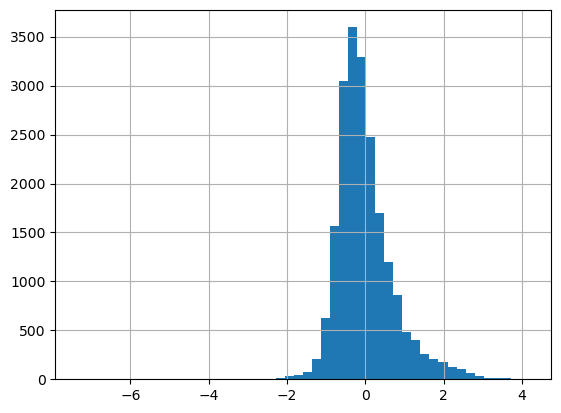

In [6]:
pd.Series(boston_target - predictions).hist(bins=50)
plt.show()

4. Encontrar o coeficientes lr.coef_

In [7]:
lr.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

5. Encontrar o interceção, que é o valor previsto, quando todas as variáveis entrada são zero

In [8]:
lr.intercept_

-36.941920207184324

6. Caso esquece os atributos de uma função, use o dir(função)

In [9]:
#dir(lr)

## Avaliando o modelo de regressão linear

1. começar importando numpy, pandas e matplotlib para visualizar

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib  inline

2. Vale a pena olhar no Q-Q plot. Usar scipy para plotar probabilidade

In [13]:
from scipy.stats import probplot

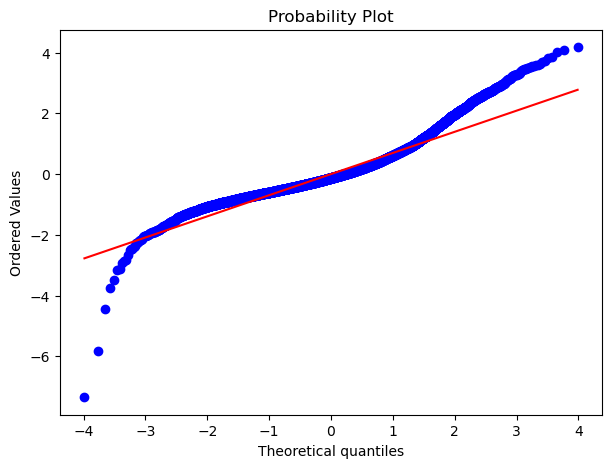

In [14]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(111)
tuple_out = probplot(boston_target - predictions, plot=ax)
plt.show()

3. escreva `tuple_out[1]` para ver o seguinte:
   

In [15]:
tuple_out[1]

(0.6957574846018635, -3.703301376051062e-15, 0.9606797762601672)

Essa tupla apresenta (declive, interceção,r) declive e interceção vêm dos ajustes do mínimos quadrados e 'r' é a raiz quadrada do coeficiente de determinação

4. Pode-se ver outras metricas dos ajustes, como o MSE(erro quadrático médio) e o MAD(desvio absoluto médio)

In [16]:
def MSE(target, predictions):
    squared_deviation = np.power(target - predictions, 2)
    return np.mean(squared_deviation)

MSE(boston_target, predictions)

0.5243209861846072

In [17]:
def MAD(target, predictions):
    absolute_deviation = np.abs(target-predictions)
    return np.mean(absolute_deviation)

MAD(boston_target, predictions)

0.5311643817546468

5. agora que viu as fórmulas no Numpy para obter os erros, é possível usar o módulo `sklearn.metrics` para obter os erros de forma mais rápida

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
print(f"MAD: {mean_absolute_error(boston_target, predictions)}")
print(f"MSE: {mean_squared_error(boston_target, predictions)}")

MAD: 0.5311643817546468
MSE: 0.5243209861846072


## Mais
Use o bootstrap para ver a distribuição dos coeficientes para a taxa de crime. Bootstrap é uma técnica para ter uma compreenção das incertezas de uma estimativa.

In [23]:
n_bootstraps = 1000
len_boston = len(boston_target)
subsamples_size = np.int64(0.5 * len_boston)

In [24]:
subsample = lambda: np.random.choice(np.arange(0,len_boston),size=subsamples_size)

In [25]:
coefs = np.ones(n_bootstraps)   #alocando o espaço para todos os coeficientes
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = data[subsample_idx]
    subsample_y = boston_target[subsample_idx]
    lr.fit(subsample_X, subsample_y)
    coefs[i] = lr.coef_[0]

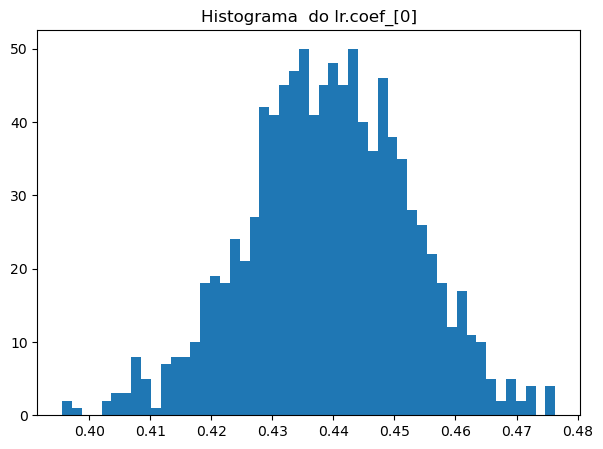

In [49]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(111)
ax.hist(coefs, bins=50)
ax.set_title("Histograma  do lr.coef_[0]")
plt.show()

Para visualizar o intervalo de confiança bootstrapped

In [28]:
np.percentile(coefs, [2.5,97.5])

array([0.41169766, 0.46470149])